In [5]:
from opt_policy_1link_sats import *
import pickle

In [49]:
d_array=np.array([1000,1500,2000])
h_array=np.array([500,1000])

In [54]:
def coherence_time(d,x):
    
    ### d is the distance between ground stations (in km);
    ### x is the coherence time of the memories (in seconds)

    c=3e8  # speed of light in m/s
    
    return int(x*c/(2*d*1e3))

In [90]:
eta_tot={}

for d in d_array:
    eta_tot[d]={}
    for h in h_array:
        eta_tot[d][h]=eta_Tot(link_distance(d*1e3,h*1e3),h*1e3)**2
 

n=1e-4
M=1e5

probs={}

for d in d_array:
    probs[d]={}
    for h in h_array:
        probs[d][h]=P(n,n,np.sqrt(eta_tot[d][h]),np.sqrt(eta_tot[d][h]),M=M)

In [62]:
t_array={d_array[0]:coherence_time(d_array[0],1),d_array[1]:coherence_time(d_array[1],1),d_array[2]:coherence_time(d_array[2],1)}

In [63]:
t_array

{1000: 150, 1500: 100, 2000: 75}

In [67]:
def get_opt_vals(d,h,t_coh,n,M):
    
    
    return [probs[d][h]]+[opt_policy(t,t_coh,n,n,np.sqrt(eta_tot[d][h]),np.sqrt(eta_tot[d][h]),fs=1,M=M) for t in range(1,8)]

In [68]:
opt_vals={}
for d in d_array:
    opt_vals[d]={}
    for h in h_array:
        print(d,h)
        opt_vals[d][h]=get_opt_vals(d,h,t_array[d],1e-4,1e5)


1000 500
1000 1000
1500 500
1500 1000
2000 500
2000 1000


In [85]:
n=1e-4
M=1e5
for d in d_array:
    for h in h_array:
        opt_vals[d][h][0]=F(n,n,np.sqrt(eta_tot[d][h]),np.sqrt(eta_tot[d][h]),fs=1,M=M)

In [91]:
probs[1000][500]

0.994374271316344

In [88]:
opt_vals[1000][500][2]

(0.9740838450975636,
 0.9943742713192872,
 {1: {0: 1, 1: 1},
  2: {(0, (0, 0)): 1,
   (0, (1, 0)): 1,
   (0, (1, 1)): 1,
   (1, (1, 0)): 1,
   (1, (0, 1)): 1,
   (1, (1, 1)): 1}},
 {1: {0: 0.005479931427645864, 1: 0.9686039136699177},
  2: {(0, (0, 0)): 0.005479931427640468,
   (0, (1, 0)): 3.082860741694486e-05,
   (0, (1, 1)): 0.0054491028202289194,
   (1, (1, 0)): 0.0054491028202289194,
   (1, (0, 1)): 0.968603913668965,
   (1, (1, 1)): 0.9631548108496888}})

In [92]:
opt_vals_f={}
opt_vals_x={}
opt_vals_F={}

for d in d_array:
    opt_vals_f[d]={}
    opt_vals_x[d]={}
    opt_vals_F[d]={}
    for h in h_array:
        opt_vals_f[d][h]=[]
        opt_vals_x[d][h]=[]
        opt_vals_F[d][h]=[]
        for i in range(len(opt_vals[d][h])):
            if i==0:
                opt_vals_f[d][h].append(opt_vals[d][h][0])
                opt_vals_x[d][h].append(probs[d][h])
                opt_vals_F[d][h].append(opt_vals[d][h][0]/probs[d][h])
            else:
                opt_vals_f[d][h].append(opt_vals[d][h][i][0])
                opt_vals_x[d][h].append(opt_vals[d][h][i][1])
                opt_vals_F[d][h].append(opt_vals[d][h][i][0]/opt_vals[d][h][i][1])
                

In [95]:
opt_vals_F[2000][500]

[0.8861798598686804,
 0.8801592184667005,
 0.8739640980362885,
 0.8676082472128847,
 0.8611064122742745,
 0.8544741511400974,
 0.8477276377524187,
 0.8408834621929263]

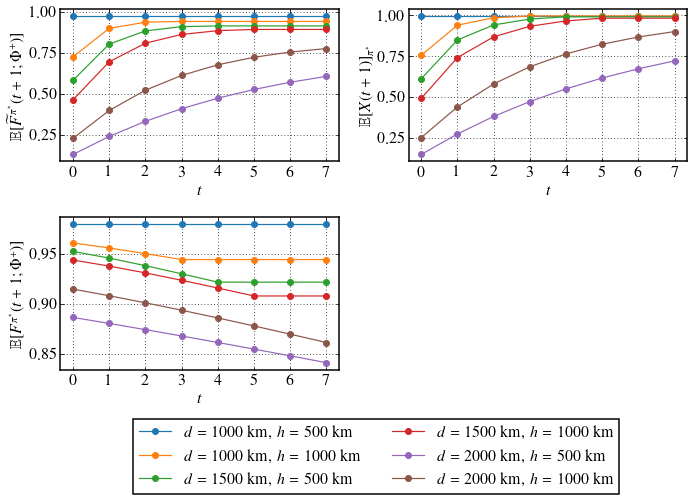

In [144]:
import matplotlib.gridspec as gridspec

#gs=gridspec.GridSpec(2,4)
#gs.update(wspace=0.9,hspace=0.4)

fig,ax=plt.subplots(2,2,figsize=(10,6.1))

#ax1=plt.subplot(gs[0,:2])
#ax2=plt.subplot(gs[0,2:])
#ax3=plt.subplot(gs[1,1:3])

#for p in p_array:
#    for t_coh in t_array:
#        plt.plot(range(8),opt_vals[p][t_coh],marker='o')
        

ax[0,0].plot(range(8),opt_vals_f[1000][500],marker='o',label=r'$d=1000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,0].plot(range(8),opt_vals_f[1000][1000],marker='o',label=r'$d=1000~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[0,0].plot(range(8),opt_vals_f[1500][500],marker='o',label=r'$d=1500~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,0].plot(range(8),opt_vals_f[1500][1000],marker='o',label=r'$d=1500~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[0,0].plot(range(8),opt_vals_f[2000][500],marker='o',label=r'$d=2000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,0].plot(range(8),opt_vals_f[2000][1000],marker='o',label=r'$d=2000~\mathrm{km},\,h=1000~\mathrm{km}$')

ax[0,0].set_xlabel(r'$t$',fontsize=16)
ax[0,0].set_ylabel(r'$\mathbb{E}[\widetilde{F}^{\pi^*}(t+1;\Phi^+)]$',fontsize=16)

ax[0,0].set_xticks([0,1,2,3,4,5,6,7])
ax[0,0].tick_params(axis='x',labelsize=16)
ax[0,0].tick_params(axis='y',labelsize=16)


ax[0,1].plot(range(8),opt_vals_x[1000][500],marker='o')#,label=r'$d=1000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,1].plot(range(8),opt_vals_x[1000][1000],marker='o')#,label=r'$d=1000~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[0,1].plot(range(8),opt_vals_x[1500][500],marker='o')#,label=r'$d=1500~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,1].plot(range(8),opt_vals_x[1500][1000],marker='o')#,label=r'$d=1500~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[0,1].plot(range(8),opt_vals_x[2000][500],marker='o')#,label=r'$d=2000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[0,1].plot(range(8),opt_vals_x[2000][1000],marker='o')#,label=r'$d=2000~\mathrm{km},\,h=1000~\mathrm{km}$')

ax[0,1].set_xlabel(r'$t$',fontsize=16)
ax[0,1].set_ylabel(r'$\mathbb{E}[X(t+1)]_{\pi^*}$',fontsize=16)

ax[0,1].set_xticks([0,1,2,3,4,5,6,7])
ax[0,1].tick_params(axis='x',labelsize=16)
ax[0,1].tick_params(axis='y',labelsize=16)


ax[1,0].plot(range(8),opt_vals_F[1000][500],marker='o')#,label=r'$d=1000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[1,0].plot(range(8),opt_vals_F[1000][1000],marker='o')#,label=r'$d=1000~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[1,0].plot(range(8),opt_vals_F[1500][500],marker='o')#,label=r'$d=1500~\mathrm{km},\,h=500~\mathrm{km}$')
ax[1,0].plot(range(8),opt_vals_F[1500][1000],marker='o')#,label=r'$d=1500~\mathrm{km},\,h=1000~\mathrm{km}$')
ax[1,0].plot(range(8),opt_vals_F[2000][500],marker='o')#,label=r'$d=2000~\mathrm{km},\,h=500~\mathrm{km}$')
ax[1,0].plot(range(8),opt_vals_F[2000][1000],marker='o')#,label=r'$d=2000~\mathrm{km},\,h=1000~\mathrm{km}$')

ax[1,0].set_xlabel(r'$t$',fontsize=16)
ax[1,0].set_ylabel(r'$\mathbb{E}[F^{\pi^*}(t+1;\Phi^+)]$',fontsize=16)

ax[1,0].set_xticks([0,1,2,3,4,5,6,7])
ax[1,0].tick_params(axis='x',labelsize=16)
ax[1,0].tick_params(axis='y',labelsize=16)

fig.delaxes(ax[1,1])

fig.legend(loc='center',ncol=2,bbox_to_anchor = (0.04,-0.57,1,1),bbox_transform = plt.gcf().transFigure,fontsize=16)

fig.tight_layout(pad=2)

fig.savefig('opt_pol_sats.pdf',bbox_inches='tight')

plt.show()

In [137]:
ax[1,0].get_position()

Bbox([[0.10247560350400407, 0.12728925883724962], [0.4890168895856034, 0.47194572382337996]])

In [138]:
ax[1,0].get_position().bounds

(0.10247560350400407,
 0.12728925883724962,
 0.3865412860815993,
 0.34465646498613034)